<a href="https://colab.research.google.com/github/AlisonJD/RTACourse/blob/main/ClickHouse_Recipes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

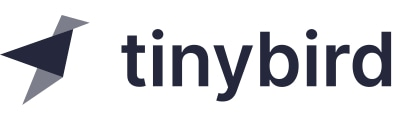
#Principles of Real-Time Analytics Course

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

% cd "/content/gdrive/My Drive/Colab Notebooks/Tinybird"

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/Tinybird


In [4]:
def write_text_to_file(filename, text):
  with open(filename, 'w') as f:
      f.write(text)

In [2]:
!pip install tinybird-cli -q

     |████████████████████████████████| 71 kB 3.7 MB/s 
     |████████████████████████████████| 81 kB 4.7 MB/s 
     |████████████████████████████████| 46 kB 2.8 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 86 kB 3.0 MB/s 
     |████████████████████████████████| 61 kB 5.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!tb auth

Copy the admin token from https://ui.tinybird.co/tokens and paste it here: 
** Auth successful! 
** Configuration written to .tinyb file, consider adding it to .gitignore


In this notebook we create this asset:

|Asset            | Activity      |
| ----------------- |:-------------:|
| recipes.datasource|create|


#ClickHouse Recipes Dataset

https://clickhouse.tech/docs/en/getting-started/example-datasets/recipes/

Here we create a datasource of recipes using the TSV creating by selecting all from the ClickHouse table of recipes.

In [5]:
filename = "datasources/recipes.datasource"
text = '''
SCHEMA >
    `title` String,
    `ingredients` Array(String),
    `directions` Array(String),
    `link` String,
    `source` LowCardinality(String),
    `NER` Array(String)
'''

write_text_to_file(filename, text)

In [6]:
!tb push datasources/recipes.datasource

** Processing datasources/recipes.datasource
** Building dependencies
** Running recipes 
** 'recipes' created
** Not pushing fixtures


In [7]:
!tb datasource append recipes "datasources/fixtures/recipes.tsv"

** 🥚 starting import process
** 🐥 done
** Total rows in recipes: 2231141
** Data appended to data source 'recipes' successfully!
** Data pushed to recipes


In [10]:
!tb sql --stats "SELECT * FROM recipes LIMIT 1"

** Query took 0.000708657 seconds
** Rows read: 1
** Bytes read: 1.33 KB
--------------------------------------------------------------------------------
title: oatmeal apple crisp Recipe adrndack
ingredients: ['5 apples; peeled, cored and cubed', '1/8 teaspoon allspice', '1/8 teaspoon cloves', '1/8 teaspoon nutmeg, freshly ground', '1 tablespoon honey', '1/4 cup butter or margarine; chilled and cut into pieces', '1/2 cup flour', '1/2 cup old fashioned oats', '1/2 cup brown sugar', '1/2 teaspoon cinnamon', '1 teaspoon vanilla extract']
directions: ['preheat oven to 375 degrees fahrenhiet.', 'grease an 8x8 baking dish.', 'combine brown sugar, flour, oats, cinnamon and vanilla extract.', 'add butter.', 'with a fork, mash together until the mixture forms moist clumps.', 'keep chilled while preparing apples.', 'in a medium bowl combine apples, allspice, cloves, nutmeg and honey.', 'toss well to coat.', 'place apples in baking dish.', 'sprinkle topping over apples.', 'bake until filling bub

In [11]:
!tb sql --rows_limit 1 --stats "SELECT * FROM recipes"

** Query took 0.001299617 seconds
** Rows read: 18
** Bytes read: 17.96 KB
--------------------------------------------------------------------------------
title: * Basic * Shijimi Clam Miso Soup *
ingredients: ['150 grams Shijimi clams (basket or freshwater clams)', '400 ml Water', '1 1/2 tbsp Miso', '1 Green onions (finely sliced)']
directions: ['Rub the shells of the shijimi clams together to remove any dirt.', 'Finely chop the green onions.', 'Pour the water and the shijimi clams into a pot over high heat.', 'When it boils, turn down the heat to low or medium and cook as you skim off the scum that rises to the surface.', 'After the clams open up, lower the heat and mix in the miso.', 'Dish it up, and scatter some green onions.']
link: cookpad.com/us/recipes/146724-%EF%BC%8A-basic-%EF%BC%8A-shijimi-clam-miso-soup-%EF%BC%8A
source: Recipes1M
NER: ['basket', 'Water', 'Green onions']
--------------------------------------------------------------------------------
